
# RNN 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('AK00100001_06MCD10K.csv')
df['surveydate']=pd.to_datetime(df['surveydate'])
df.set_index('surveydate',inplace=True)
df=df.asfreq('W-WED')
df=df.fillna(method = 'ffill', axis = 0) # fill the 8 NaN value with forwarding values 
df=df.drop(columns=['accountnumber','productcode','INST_NM','branchType'])


In [4]:
df.head()

,rate
surveydate,
1999-10-27,4.86
1999-11-03,4.86
1999-11-10,4.86
1999-11-17,4.76
1999-11-24,4.76


In [5]:
df.columns = ['rate']

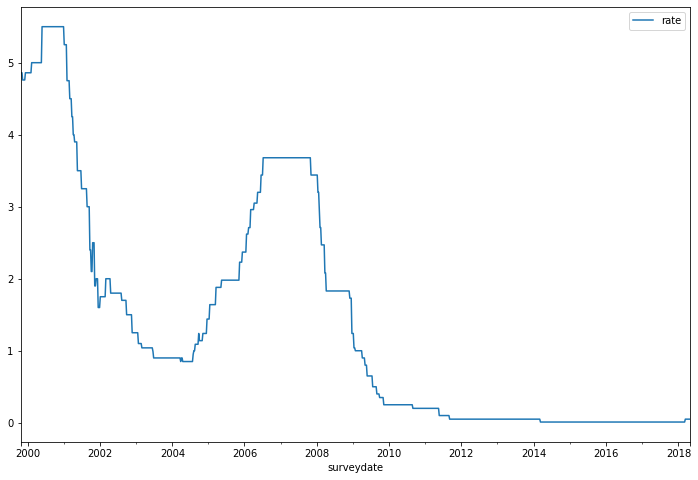

In [6]:
df.plot(figsize=(12,8))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

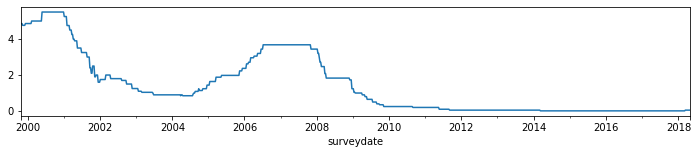

In [9]:
results = seasonal_decompose(df['rate'])
results.observed.plot(figsize=(12,2))

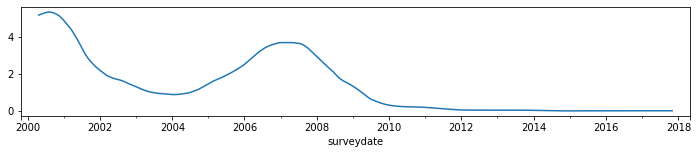

In [10]:
results.trend.plot(figsize=(12,2))

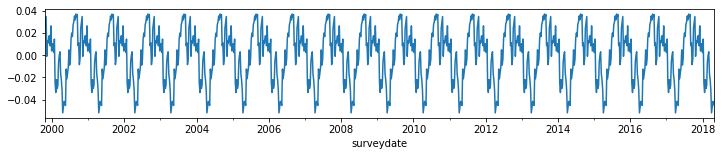

In [11]:
results.seasonal.plot(figsize=(12,2))

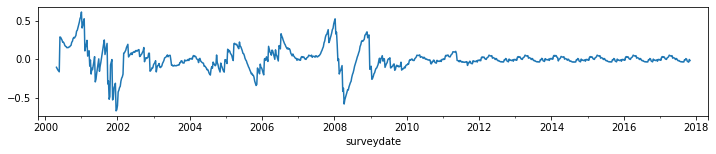

In [12]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [13]:
len(df)

967

In [15]:
len(df)-52

915

In [16]:
train = df.iloc[:915]
test = df.iloc[915:]

In [17]:
len(test)

52

## Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [23]:
scaled_train

array([[0.88342441],
       [0.88342441],
       [0.88342441],
       [0.86520947],
       [0.86520947],
       [0.86520947],
       [0.86520947],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.88342441],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [0.90892532],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [24]:
# define generator
n_input = 52
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
len(scaled_train)

915

In [26]:
len(generator) # n_input = 2

863

In [24]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [27]:
# What does the first batch look like?
X,y = generator[0]

In [28]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.88342441 0.88342441 0.88342441 0.86520947 0.86520947 0.86520947
 0.86520947 0.88342441 0.88342441 0.88342441 0.88342441 0.88342441
 0.88342441 0.88342441 0.88342441 0.88342441 0.90892532 0.90892532
 0.90892532 0.90892532 0.90892532 0.90892532 0.90892532 0.90892532
 0.90892532 0.90892532 0.90892532 0.90892532 0.90892532 0.90892532
 0.90892532 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Predict this y: 
 [[1.]]


### Create the Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0818 23:15:29.475194 34712 deprecation_wrapper.py:119] From C:\Users\caiyi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 23:15:29.507109 34712 deprecation_wrapper.py:119] From C:\Users\caiyi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 23:15:29.518079 34712 deprecation_wrapper.py:119] From C:\Users\caiyi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 23:15:29.684114 34712 deprecation_wrapper.py:119] From C:\Users\caiyi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [35]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
863/863 [==============================] - 18s 20ms/step - loss: 1.7699e-04
Epoch 2/50
863/863 [==============================] - ETA: 0s - loss: 1.9164e-0 - 20s 23ms/step - loss: 1.9355e-04
Epoch 3/50
863/863 [==============================] - 19s 22ms/step - loss: 1.9783e-04
Epoch 4/50
863/863 [==============================] - 19s 22ms/step - loss: 1.8669e-04 0s - loss: 1.895
Epoch 5/50
863/863 [==============================] - 20s 23ms/step - loss: 2.0043e-04
Epoch 6/50
863/863 [==============================] - 19s 22ms/step - loss: 2.0357e-04
Epoch 7/50
863/863 [==============================] - 19s 22ms/step - loss: 1.9558e-04
Epoch 8/50
863/863 [==============================] - 20s 23ms/step - loss: 1.9913e-04 0s - loss
Epoch 9/50
863/863 [==============================] - 20s 23ms/step - loss: 1.8111e-04
Epoch 10/50
863/863 [==============================] - 19s 22ms/step - loss: 2.0678e-04
Epoch 11/50
863/863 [==============================] - 20s 23ms/step - los

In [36]:
model.history.history.keys()

dict_keys(['loss'])

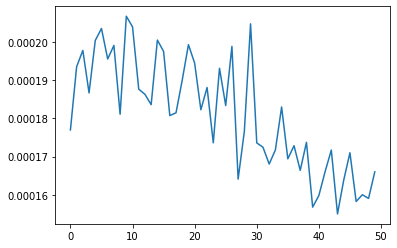

In [37]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [38]:
first_eval_batch = scaled_train[-52:]

In [39]:
first_eval_batch

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(first_eval_batch)

array([[-0.00145788]], dtype=float32)

In [42]:
scaled_test[0]

array([0.])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [44]:
current_batch.shape

(1, 52, 1)

In [45]:
current_batch

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
test_predictions

[array([-0.00145788], dtype=float32),
 array([-0.00231269], dtype=float32),
 array([-0.00307582], dtype=float32),
 array([-0.00383639], dtype=float32),
 array([-0.00460538], dtype=float32),
 array([-0.00538717], dtype=float32),
 array([-0.00618416], dtype=float32),
 array([-0.00699803], dtype=float32),
 array([-0.00783025], dtype=float32),
 array([-0.00868216], dtype=float32),
 array([-0.00955512], dtype=float32),
 array([-0.01045054], dtype=float32),
 array([-0.0113699], dtype=float32),
 array([-0.01231474], dtype=float32),
 array([-0.01328674], dtype=float32),
 array([-0.0142877], dtype=float32),
 array([-0.0153195], dtype=float32),
 array([-0.01638427], dtype=float32),
 array([-0.01748423], dtype=float32),
 array([-0.01862183], dtype=float32),
 array([-0.01979974], dtype=float32),
 array([-0.02102086], dtype=float32),
 array([-0.02228835], dtype=float32),
 array([-0.02360567], dtype=float32),
 array([-0.02497365], dtype=float32),
 array([-0.0263937], dtype=float32),
 array([-0.02786

In [48]:
scaled_test

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00728597],
       [0.00728597],
       [0.00728597],
       [0.007

## Inverse Transformations and Compare

In [49]:
true_predictions = scaler.inverse_transform(test_predictions)

In [50]:
true_predictions

array([[ 0.00199621],
       [-0.00269667],
       [-0.00688627],
       [-0.0110618 ],
       [-0.01528355],
       [-0.01957557],
       [-0.02395104],
       [-0.0284192 ],
       [-0.03298806],
       [-0.03766507],
       [-0.04245759],
       [-0.04737348],
       [-0.05242075],
       [-0.05760791],
       [-0.0629442 ],
       [-0.06843945],
       [-0.07410404],
       [-0.07994966],
       [-0.08598844],
       [-0.09223386],
       [-0.09870057],
       [-0.10540452],
       [-0.11236305],
       [-0.11959515],
       [-0.12710532],
       [-0.13490139],
       [-0.14299566],
       [-0.1514102 ],
       [-0.16016916],
       [-0.1692996 ],
       [-0.17883236],
       [-0.18880207],
       [-0.19924772],
       [-0.21021277],
       [-0.22174671],
       [-0.23390525],
       [-0.24675106],
       [-0.26032928],
       [-0.27468729],
       [-0.28989528],
       [-0.30602786],
       [-0.32317223],
       [-0.34144857],
       [-0.36099726],
       [-0.38198274],
       [-0

In [55]:
#test

In [52]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
test

,rate,Predictions
surveydate,,
2017-05-10,0.01,0.001996
2017-05-17,0.01,-0.002697
2017-05-24,0.01,-0.006886
2017-05-31,0.01,-0.011062
2017-06-07,0.01,-0.015284
2017-06-14,0.01,-0.019576
2017-06-21,0.01,-0.023951
2017-06-28,0.01,-0.028419
2017-07-05,0.01,-0.032988


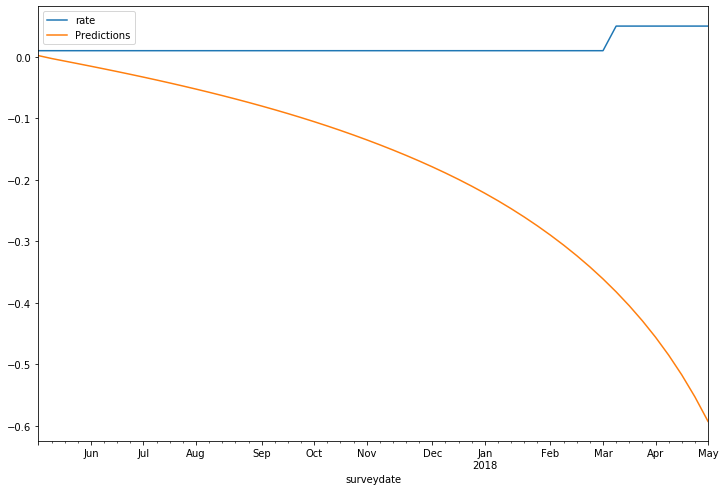

In [54]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [54]:
model.save('my_rnn_model.h5')

## load a model

In [55]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [56]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
